In [1]:
import numpy as np
#import scipy as sp
import pandas as pd
import seaborn as sns
#import sqlalchemy
import matplotlib.pyplot as plt

In [67]:
url = 'https://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'
filename = '../data/dist.all.last.csv'
df_last_names = pd.read_csv(filename, delim_whitespace=True, header=None, nrows=300)
lastnames = df_last_names.iloc[:,0].values
print(lastnames.shape)

(300,)


In [68]:
lastnames = df_last_names.loc[df_last_names[0] != 'ROBINSON',0].values

In [69]:
lastnames

array(['SMITH', 'JOHNSON', 'WILLIAMS', 'JONES', 'BROWN', 'DAVIS', 'MILLER',
       'WILSON', 'MOORE', 'TAYLOR', 'ANDERSON', 'THOMAS', 'JACKSON',
       'WHITE', 'HARRIS', 'MARTIN', 'THOMPSON', 'GARCIA', 'MARTINEZ',
       'CLARK', 'RODRIGUEZ', 'LEWIS', 'LEE', 'WALKER', 'HALL', 'ALLEN',
       'YOUNG', 'HERNANDEZ', 'KING', 'WRIGHT', 'LOPEZ', 'HILL', 'SCOTT',
       'GREEN', 'ADAMS', 'BAKER', 'GONZALEZ', 'NELSON', 'CARTER',
       'MITCHELL', 'PEREZ', 'ROBERTS', 'TURNER', 'PHILLIPS', 'CAMPBELL',
       'PARKER', 'EVANS', 'EDWARDS', 'COLLINS', 'STEWART', 'SANCHEZ',
       'MORRIS', 'ROGERS', 'REED', 'COOK', 'MORGAN', 'BELL', 'MURPHY',
       'BAILEY', 'RIVERA', 'COOPER', 'RICHARDSON', 'COX', 'HOWARD', 'WARD',
       'TORRES', 'PETERSON', 'GRAY', 'RAMIREZ', 'JAMES', 'WATSON',
       'BROOKS', 'KELLY', 'SANDERS', 'PRICE', 'BENNETT', 'WOOD', 'BARNES',
       'ROSS', 'HENDERSON', 'COLEMAN', 'JENKINS', 'PERRY', 'POWELL',
       'LONG', 'PATTERSON', 'HUGHES', 'FLORES', 'WASHINGTON', 'BUTLER',
 

In [3]:
np.random.seed=123

In [179]:
def gen_star():
    star = np.ceil(np.random.normal(loc=3,scale=1.5))
    if star < 1:
        star = 1
    elif star > 5:
        star = 5
    return int(star)

from datetime import date
import random

start_date = date.today().replace(day=1, month=1).toordinal()
end_date = date.today().toordinal()

names_list = []
stars_list = []
dates_list = []

p_robinson = 0.15
p_repeat = 0.4

for i in range(1000):
    p1 = np.random.rand()
    if p1 > p_robinson:
        p2 = np.random.rand()
        if len(names_list) > 0 and p2 < p_repeat:
            p3 = np.random.randint(0,len(names_list))
            names_list.append(names_list[p3])
        else:
            p3 = np.random.randint(0,len(lastnames))
            names_list.append(lastnames[p3])
        stars_list.append(gen_star())
    else:
        names_list.append('ROBINSON')
        p2 = np.random.rand()
        if p2 < .8:
            stars_list.append(5)
        else:
            stars_list.append(gen_star())
            
    dates_list.append( date.fromordinal(random.randint(start_date, end_date)))
    
print(len(names_list),len(stars_list),len(dates_list))

1000 1000 1000


In [180]:
data = {'lastname':names_list, 'stars':stars_list, 'purchase_date':dates_list}

df = pd.DataFrame(data)

In [181]:
df.lastname.value_counts().head()

ROBINSON    208
DANIELS      37
BURKE        16
JACOBS       16
CALDWELL     15
Name: lastname, dtype: int64

In [182]:
sum(df.lastname.value_counts() > 1)

180

In [183]:
len(df.lastname.unique())

253

In [184]:
def draw_price(n):
    prods = np.random.randint(0,100,size=(n,1))
    prices = np.empty(n)
    for idx,prod in enumerate(prods):
        if prod <= 25:
            prices[idx] = np.random.normal(loc=10,scale=1)
        elif prod <= 70:
            prices[idx] = np.random.normal(loc=20,scale=1)
        elif prod <= 97:
            prices[idx] = np.random.normal(loc=40,scale=1)
        else:
            prices[idx] = np.nan
    return prices

In [185]:
draw_price(10)

array([ 41.05484539,  38.03819095,  20.06099999,          nan,
        10.05674195,  20.10475896,  10.6434863 ,   9.32056618,
                nan,  40.13175211])

In [186]:
df['price'] = draw_price(len(df))

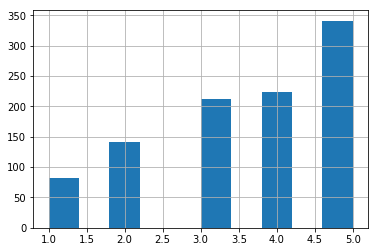

In [187]:
df.stars.hist()

In [188]:
df = df.iloc[np.random.permutation(len(df))].reset_index(drop=True)

In [189]:
df.head()

,lastname,purchase_date,stars,price
0,PERKINS,2017-04-08,5,19.599886
1,ROBINSON,2017-01-01,5,37.983904
2,WILLIAMSON,2017-03-20,4,19.339138
3,ROBINSON,2017-04-12,5,18.140616
4,RHODES,2017-03-24,1,22.179522


In [190]:
robinson_mean = df[df.lastname == 'ROBINSON'].stars.mean()
print(robinson_mean)

4.23076923077


In [191]:
other_mean = df[df.lastname != 'ROBINSON'].stars.mean()
print(other_mean)

3.43308080808


In [192]:
robinson_mean_diff = robinson_mean - other_mean
print(robinson_mean_diff)

0.797688422688


In [193]:
n_robinson = len(df[df.lastname == 'ROBINSON'])
n_other = len(df) - n_robinson

In [194]:
stars = df.stars.values

In [195]:
mean_diffs = []

for i in range(10000):
    perm = np.random.permutation(stars)
    mean_1 = np.sum(perm[:n_robinson] / n_robinson)
    mean_2 = np.sum(perm[n_robinson:] / n_other)
    mean_diffs.append(mean_1-mean_2)

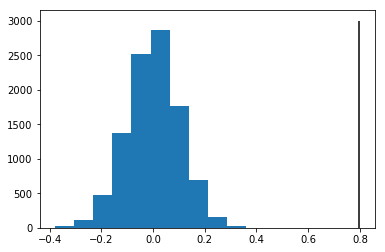

In [196]:
_  = plt.hist(mean_diffs)
_  = plt.vlines(x=robinson_mean_diff, ymin = 0, ymax = 3000)

In [197]:
p = sum(mean_diffs >= robinson_mean_diff) / len(mean_diffs)
print(p)

0.0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
lastname         1000 non-null object
purchase_date    1000 non-null object
stars            1000 non-null int64
price            978 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [199]:
df[df.stars == 5].lastname.value_counts().head()

ROBINSON    135
DANIELS       9
CALDWELL      8
JACOBS        6
JOHNSTON      6
Name: lastname, dtype: int64

In [200]:
flower_names = np.array(['rose','carnation','tulip','daisy','sunflower','daffodil','gerbera','orchid','iris','lilac','gardenia','jasmine'])

In [201]:
len(flower_names)

12

In [202]:
name_to_flower_dict = {}

for name in df.lastname.unique():
    name_to_flower_dict[name] = flower_names[np.random.randint(0,len(flower_names))]

In [203]:
#flower_idx = np.random.randint(0,len(flower_names),size=1000)

In [204]:
df['favorite_flower'] = [name_to_flower_dict[x] for x in df.lastname.values]

In [205]:
df.head()

,lastname,purchase_date,stars,price,favorite_flower
0,PERKINS,2017-04-08,5,19.599886,iris
1,ROBINSON,2017-01-01,5,37.983904,lilac
2,WILLIAMSON,2017-03-20,4,19.339138,carnation
3,ROBINSON,2017-04-12,5,18.140616,lilac
4,RHODES,2017-03-24,1,22.179522,carnation


In [206]:
df.to_csv('../data/week1_flowershop_data.csv', index=False)